#PROJECT OVERVIEW & BUSINESS UNDERSTANDING

"""
PROJECT OVERVIEW:
Industri hiburan, khususnya platform streaming film, membutuhkan sistem rekomendasi
yang efektif untuk meningkatkan user engagement dan kepuasan pengguna. Sistem
rekomendasi membantu pengguna menemukan film yang sesuai dengan preferensi mereka
dari ribuan pilihan yang tersedia.

BUSINESS UNDERSTANDING:
- Problem Statement: Bagaimana cara merekomendasikan film yang relevan berdasarkan
  preferensi genre pengguna?
- Goals: Membangun sistem rekomendasi yang dapat memberikan rekomendasi film personal
  berdasarkan riwayat preferensi genre pengguna
- Solution Approach: Content-Based Filtering menggunakan similarity analysis
"""

#DATA UNDERSTANDING & PREPARATION

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import pickle
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MultiLabelBinarizer
import warnings
warnings.filterwarnings('ignore')

print("=== MOVIE RECOMMENDATION SYSTEM ===")
print("Libraries imported successfully!")


=== MOVIE RECOMMENDATION SYSTEM ===
Libraries imported successfully!


| Baris Kode                                                    | Fungsi                                                                                              |
| ------------------------------------------------------------- | --------------------------------------------------------------------------------------------------- |
| `import pandas as pd`                                         | Untuk manipulasi data dalam bentuk tabel (DataFrame).                                               |
| `import numpy as np`                                          | Untuk perhitungan numerik seperti array dan matrix.                                                 |
| `import pickle`                                               | Untuk memuat atau menyimpan objek Python ke dalam file binary, seperti dictionary user preferences. |
| `import zipfile`                                              | Untuk mengekstrak file ZIP (dataset kamu dalam bentuk ZIP).                                         |
| `import matplotlib.pyplot as plt`                             | Untuk membuat visualisasi (grafik, histogram, dll).                                                 |
| `import seaborn as sns`                                       | Untuk visualisasi statistik yang lebih menarik dan informatif (opsional).                           |
| `from sklearn.feature_extraction.text import TfidfVectorizer` | (Tidak digunakan di versi final, awalnya untuk model berbasis teks).                                |
| `from sklearn.metrics.pairwise import cosine_similarity`      | Untuk menghitung kesamaan antara vektor (digunakan dalam content-based filtering).                  |
| `from sklearn.preprocessing import MultiLabelBinarizer`       | Mengubah list genre menjadi vektor biner (fitur film).                                              |
| `import warnings; warnings.filterwarnings('ignore')`          | Menyembunyikan peringatan runtime agar output tidak berisik di Colab.                               |


In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Baris ini menjalankan fungsi mount() dari modul drive. Fungsinya adalah untuk menghubungkan Google Drive kamu ke mesin virtual Google Colab sehingga kamu bisa mengakses file yang ada di Google Drive langsung dari Colab.



In [3]:
# Extract dataset
zip_path = '/content/drive/MyDrive/Content based filtering/archive (4).zip'
extract_path = '/content/content_based_filtering'

print("\n=== EXTRACTING DATASET ===")
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("Dataset extracted successfully!")



=== EXTRACTING DATASET ===
Dataset extracted successfully!


zip_path = '/content/drive/MyDrive/Content based filtering/archive (4).zip'
Ini adalah path (lokasi) file ZIP yang ingin kamu ekstrak. File ZIP tersebut berada di Google Drive kamu, tepatnya di folder MyDrive/Content based filtering dengan nama file archive (4).zip.

extract_path = '/content/content_based_filtering'
Ini adalah path tujuan di mana isi file ZIP akan diekstrak. Dalam kasus ini, folder content_based_filtering di dalam sistem file lokal Google Colab (direktori /content).

print("\n=== EXTRACTING DATASET ===")
Ini hanya mencetak pesan di output supaya kita tahu bahwa proses ekstraksi sedang dimulai.

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
Baris ini membuka file ZIP dalam mode baca ('r') menggunakan modul zipfile Python.

zip_ref adalah objek yang mewakili file ZIP tersebut selama blok with berjalan.

zip_ref.extractall(extract_path)
Baris ini mengekstrak semua isi file ZIP ke folder tujuan yang sudah ditentukan (extract_path).

print("Dataset extracted successfully!")
Setelah ekstraksi selesai, mencetak pesan bahwa dataset sudah berhasil diekstrak.



In [4]:
# Define file paths
csv_path = '/content/content_based_filtering/content_movie_list.csv'
pickle_path = '/content/content_based_filtering/content_user_to_genre.pickle'
header_path = '/content/content_based_filtering/content_user_train_header.txt'

print("\n=== LOADING DATA FILES ===")



=== LOADING DATA FILES ===


csv_path = '/content/content_based_filtering/content_movie_list.csv'
Mendefinisikan variabel csv_path yang menyimpan lokasi file CSV bernama content_movie_list.csv. File ini kemungkinan berisi data daftar film dalam format tabel (Comma-Separated Values).

pickle_path = '/content/content_based_filtering/content_user_to_genre.pickle'
Mendefinisikan variabel pickle_path yang menyimpan lokasi file dengan ekstensi .pickle. File pickle biasanya berisi data Python yang sudah disimpan dalam format serialized (disimpan secara khusus agar bisa langsung dibaca kembali oleh Python). Di sini, mungkin berisi peta (mapping) antara user dan genre film.

header_path = '/content/content_based_filtering/content_user_train_header.txt'
Mendefinisikan variabel header_path yang menyimpan lokasi file teks .txt, mungkin berisi informasi header atau metadata yang terkait dengan data pelatihan user.

print("\n=== LOADING DATA FILES ===")
Mencetak pesan ke output bahwa proses memuat (loading) file data akan dimulai. Pesan ini berguna sebagai indikator di console supaya kita tahu di tahap mana program sedang berjalan.

In [5]:
# Load movie data
movie_list = pd.read_csv(csv_path)
print(f"Movie data loaded: {movie_list.shape}")

# Load user header
with open(header_path, 'r') as header:
    for line in header:
        user_header = line.strip().split(',')
print(f"User header loaded: {len(user_header)} columns")

# Load user-genre preferences
with open(pickle_path, 'rb') as f:
    user_to_genre = pickle.load(f)
print(f"User preferences loaded: {len(user_to_genre)} users")


Movie data loaded: (694, 3)
User header loaded: 17 columns
User preferences loaded: 395 users


In [6]:
print("\n=== DATA LOADING SUMMARY ===")
print(f"Number of movies: {len(movie_list)}")
print(f"Number of users: {len(user_to_genre)}")



=== DATA LOADING SUMMARY ===
Number of movies: 694
Number of users: 395


Movie data loaded: (694, 3)

Ini artinya file CSV content_movie_list.csv berisi 694 baris dan 3 kolom.

Jadi, dataset film tersebut memuat informasi untuk 694 film, dengan 3 atribut (misalnya bisa jadi movie_id, title, dan genre atau atribut lain).

User header loaded: 17 columns

File header teks yang dibaca berisi sebuah baris dengan 17 kolom.

Biasanya ini berarti data pengguna atau fitur yang berhubungan dengan user tersebut terdiri dari 17 atribut/faktor.

Kolom ini bisa berupa nama-nama fitur atau label yang nanti digunakan untuk mengidentifikasi atau memproses data user.

User preferences loaded: 395 users

File pickle yang berisi preferensi user ke genre film menunjukkan ada 395 pengguna yang datanya berhasil dimuat.

Artinya, data preferensi genre film ini tersedia untuk 395 user unik.



#EXPLORATORY DATA ANALYSIS (EDA)

In [7]:
# Display basic information about the dataset
print("\n1. Movie Dataset Info:")
print(movie_list.info())



1. Movie Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694 entries, 0 to 693
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  694 non-null    int64 
 1   title    694 non-null    object
 2   genres   694 non-null    object
dtypes: int64(1), object(2)
memory usage: 16.4+ KB
None


Dataset film ini berisi 694 film, setiap film memiliki ID unik, judul, dan genre.

Tidak ada data yang hilang (missing values) di ketiga kolom.

Format data sudah rapi dan siap dipakai untuk analisis atau sistem rekomendasi.

In [8]:
print("\n2. First 5 movies:")
print(movie_list.head())



2. First 5 movies:
   movieId                                 title                  genres
0     4054            Save the Last Dance (2001)           Drama|Romance
1     4069           Wedding Planner, The (2001)          Comedy|Romance
2     4148                       Hannibal (2001)         Horror|Thriller
3     4149  Saving Silverman (Evil Woman) (2001)          Comedy|Romance
4     4153                  Down to Earth (2001)  Comedy|Fantasy|Romance


movieId:
Merupakan ID unik untuk setiap film.

Misalnya: 4054, 4069, dll.

ID ini biasanya digunakan untuk pencocokan (matching) dengan data lain seperti rating, user preference, dll.

2. title:
Berisi judul lengkap film, termasuk tahun rilis di dalam tanda kurung.

Contoh: "Save the Last Dance (2001)", "Hannibal (2001)".

Tahun rilis mempermudah membedakan film dengan judul yang mirip.

3. genres:
Berisi daftar genre film, dipisahkan dengan karakter | (pipe).

Contoh:

"Drama|Romance" → berarti film bergenre Drama dan Romance.

"Comedy|Fantasy|Romance" → berarti film mencampur unsur komedi, fantasi, dan romantis.

Tujuan Data Ini:
Data ini akan sangat berguna dalam sistem Content-Based Filtering, karena genre dan judul merupakan fitur utama yang dapat dibandingkan dengan preferensi pengguna. Misalnya:

Jika pengguna suka genre Comedy dan Romance, maka film seperti "Wedding Planner, The" atau "Saving Silverman" mungkin cocok direkomendasikan.

In [9]:
print("\n3. Dataset Statistics:")
print(movie_list.describe())



3. Dataset Statistics:
             movieId
count     694.000000
mean    47990.858790
std     42944.060806
min      4054.000000
25%      6570.250000
50%     45439.000000
75%     73245.000000
max    187593.000000


| Statistik | Nilai         | Penjelasan                                                                       |
| --------- | ------------- | -------------------------------------------------------------------------------- |
| count     | 694.000000    | Jumlah film dalam dataset (694 buah). Sama seperti jumlah baris.                 |
| mean      | 47990.858790  | Rata-rata ID film: 47.990 — hanya menunjukkan nilai tengah, **bukan urutan**.    |
| std       | 42944.060806  | Standar deviasi (sebaran data) yang tinggi, artinya `movieId` sangat bervariasi. |
| min       | 4054.000000   | ID film terkecil di dataset.                                                     |
| 25%       | 6570.250000   | Kuartil pertama: 25% film punya ID ≤ 6570.                                       |
| 50%       | 45439.000000  | Median (titik tengah data): ID ke-347 punya nilai ini.                           |
| 75%       | 73245.000000  | Kuartil ketiga: 75% film punya ID ≤ 73.245.                                      |
| max       | 187593.000000 | ID film terbesar dalam dataset.                                                  |


In [10]:
print("\n4. Missing Values:")
print(movie_list.isnull().sum())



4. Missing Values:
movieId    0
title      0
genres     0
dtype: int64


Semua kolom memiliki 0 missing values. Artinya:

Tidak ada film yang tidak memiliki ID (movieId).

Semua film memiliki judul lengkap (title).

Semua film memiliki genre yang tercatat (genres).

In [11]:

print("Available columns:", movie_list.columns)
print("Null genres count:", movie_list['genres'].isnull().sum())
print("Sample genres:", movie_list['genres'].dropna().head())

Available columns: Index(['movieId', 'title', 'genres'], dtype='object')
Null genres count: 0
Sample genres: 0             Drama|Romance
1            Comedy|Romance
2           Horror|Thriller
3            Comedy|Romance
4    Comedy|Fantasy|Romance
Name: genres, dtype: object


| Index | Genres                   | Arti                                                    |
| ----- | ------------------------ | ------------------------------------------------------- |
| 0     | Drama\|Romance           | Film ini bergenre Drama dan Romance.                    |
| 1     | Comedy\|Romance          | Film ini bergenre Komedi dan Romantis.                  |
| 2     | Horror\|Thriller         | Film ini bergenre Horor dan Thriller.                   |
| 3     | Comedy\|Romance          | Sama seperti baris ke-1.                                |
| 4     | Comedy\|Fantasy\|Romance | Film ini mencampur genre Komedi, Fantasi, dan Romantis. |



5. Genre Analysis:
Top 10 most common genres:
Comedy       296
Drama        281
Action       234
Thriller     211
Adventure    166
Romance      130
Sci-Fi       127
Crime        124
Fantasy       88
Mystery       59
Name: count, dtype: int64


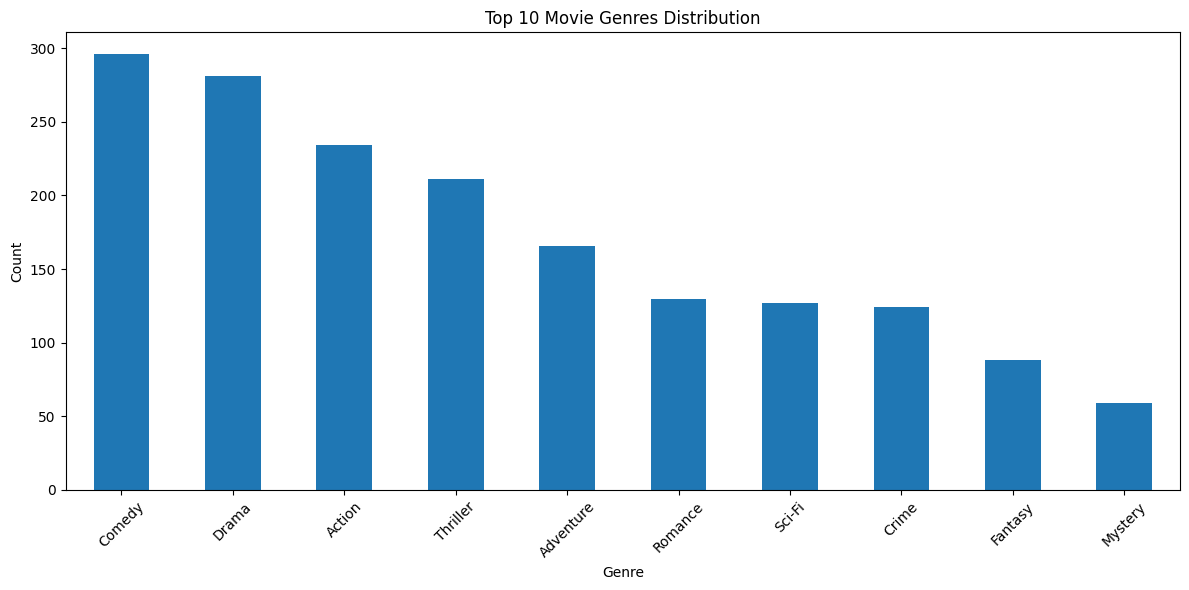

In [12]:
print("\n5. Genre Analysis:")
if 'genres' in movie_list.columns:
    all_genres = []
    for genres in movie_list['genres'].dropna():
        if isinstance(genres, str):
            all_genres.extend([g.strip() for g in genres.split('|')])

    genre_counts = pd.Series(all_genres).value_counts()
    print("Top 10 most common genres:")
    print(genre_counts.head(10))

    plt.figure(figsize=(12, 6))
    genre_counts.head(10).plot(kind='bar')
    plt.title('Top 10 Movie Genres Distribution')
    plt.xlabel('Genre')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**Top 10 Genre Film Paling Umum:**

1. **Comedy (296 film)**
   Genre paling sering muncul. Ini menunjukkan bahwa film bergenre komedi sangat populer atau sering diproduksi.

2. **Drama (281 film)**
   Hampir setara dengan komedi. Drama juga merupakan genre yang sangat dominan, mungkin karena fleksibilitas temanya.

3. **Action (234 film)**
   Genre aksi menempati urutan ketiga. Aksi sering diminati karena daya tarik visual dan adrenalin tinggi.

4. **Thriller (211 film)**
   Film yang memacu ketegangan dan misteri. Cukup populer, menandakan minat tinggi terhadap cerita menegangkan.

5. **Adventure (166 film)**
   Genre petualangan menonjol, mungkin karena daya tarik eksplorasi dan perjalanan epik.

6. **Romance (130 film)**
   Genre percintaan juga signifikan, biasanya menarik bagi audiens yang menginginkan narasi emosional.

7. **Sci-Fi (127 film)**
   Fiksi ilmiah cukup umum, menunjukkan ketertarikan terhadap cerita berbasis teknologi dan masa depan.

8. **Crime (124 film)**
   Genre kriminalitas juga banyak ditemukan, karena ceritanya yang sering penuh konflik dan misteri.

9. **Fantasy (88 film)**
   Genre ini lebih niche, tapi masih cukup populer, terutama di kalangan penggemar dunia imajinatif.

10. **Mystery (59 film)**
    Meskipun berada di urutan terakhir dari 10 besar, genre misteri tetap relevan dan diminati.

**Kesimpulan:**

* Genre **komedi dan drama** mendominasi industri film dalam dataset ini.
* Genre seperti **mystery dan fantasy** lebih jarang ditemukan, meskipun masih cukup signifikan untuk masuk ke daftar 10 besar.
* Genre populer cenderung mencerminkan permintaan pasar atau strategi komersial dari produser film.

In [13]:
# Analyze user preferences
print("\n6. User Preference Analysis (sample):")
for i, (user, prefs) in enumerate(user_to_genre.items()):
    print(f"User {user}: {prefs}")
    if i >= 2:
        break


6. User Preference Analysis (sample):
User 2: {'glist': array([[3.9  , 5.   , 0.   , 0.   , 4.   , 4.2  , 4.   , 4.   , 0.   ,
        3.   , 4.   , 0.   , 4.25 , 3.875]]), 'g_count': array([[5., 1., 0., 0., 5., 5., 2., 9., 0., 1., 1., 0., 2., 8.]]), 'rating_count': 16, 'rating_sum': np.float64(65.0), 'movies': {np.int64(6874): np.float64(4.0), np.int64(8798): np.float64(3.5), np.int64(46970): np.float64(4.0), np.int64(48516): np.float64(4.0), np.int64(60756): np.float64(5.0), np.int64(71535): np.float64(3.0), np.int64(74458): np.float64(4.0), np.int64(77455): np.float64(3.0), np.int64(80489): np.float64(4.5), np.int64(80906): np.float64(5.0), np.int64(89774): np.float64(5.0), np.int64(91658): np.float64(2.5), np.int64(106782): np.float64(5.0), np.int64(112552): np.float64(4.0), np.int64(115713): np.float64(3.5), np.int64(122882): np.float64(5.0)}, 'rating_ave': np.float64(4.0625)}
User 3: {'glist': array([[0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0.5,
        0.5]]

Struktur ini mewakili profil konten tiap user berdasarkan genre.

Berguna untuk content-based filtering, misalnya:

Bandingkan glist user dengan genre film baru → jika mirip dan g_count cukup tinggi, bisa direkomendasikan.

Data movies bisa dipakai untuk evaluasi: apakah sistem merekomendasikan film yang sudah pernah ditonton?

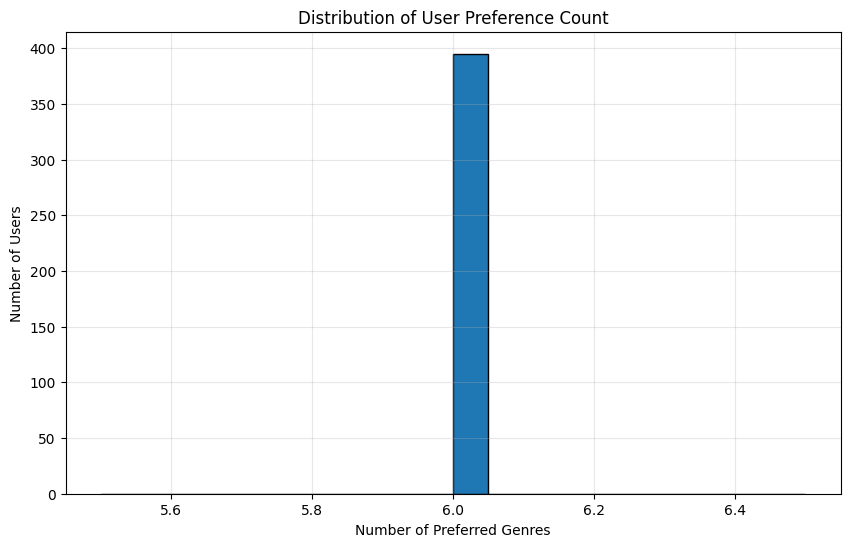

In [14]:
# Plot distribution of number of preferred genres per user
user_pref_lengths = [len(prefs) for prefs in user_to_genre.values()]
plt.figure(figsize=(10, 6))
plt.hist(user_pref_lengths, bins=20, edgecolor='black')
plt.title('Distribution of User Preference Count')
plt.xlabel('Number of Preferred Genres')
plt.ylabel('Number of Users')
plt.grid(True, alpha=0.3)
plt.show()

Tidak ada variasi dalam jumlah genre yang disukai antar pengguna (semua memilih 6).

Ini menyebabkan grafik hanya memiliki satu batang tunggal pada angka 6, dan distribusinya menjadi sangat terpusat (tidak menyebar sama sekali).

In [15]:
print(f"Average genres per user: {np.mean(user_pref_lengths):.2f}")
print(f"Max genres per user: {max(user_pref_lengths)}")
print(f"Min genres per user: {min(user_pref_lengths)}")

Average genres per user: 6.00
Max genres per user: 6
Min genres per user: 6


Semua pengguna dalam dataset memilih tepat 6 genre sebagai preferensi mereka.

Tidak ada variasi antar pengguna dalam jumlah genre yang disukai.

Distribusi ini sepenuhnya seragam (uniform), sehingga:

Rata-rata, maksimum, dan minimum semuanya bernilai 6.

Cocok untuk sistem yang mengharuskan pengguna memilih jumlah genre yang tetap (misalnya dalam survei atau input awal profil).

#DATA PREPARATION

##Cleaning movie data

In [16]:
# Remove rows with missing essential information
movie_clean = movie_list.dropna(subset=['title']).copy()
print(f"Movies after cleaning: {len(movie_clean)}")

# Handle missing genres
if 'genres' in movie_clean.columns:
    movie_clean['genres'] = movie_clean['genres'].fillna('Unknown')


Movies after cleaning: 694


Setelah proses pembersihan data (data cleaning) selesai dilakukan, jumlah total film yang tersisa dalam dataset adalah 694 film.

##Creating genre features

In [17]:
def preprocess_genres(genre_string):
    """Convert genre string to list of genres"""
    if pd.isna(genre_string) or genre_string == 'Unknown':
        return ['Unknown']
    return [g.strip() for g in str(genre_string).split('|')]

# Apply genre preprocessing
movie_clean['genre_list'] = movie_clean['genres'].apply(preprocess_genres)

# Create binary genre matrix
mlb = MultiLabelBinarizer()
genre_matrix = mlb.fit_transform(movie_clean['genre_list'])
genre_df = pd.DataFrame(genre_matrix, columns=mlb.classes_)

print(f"Genre features created: {genre_df.shape[1]} unique genres")
print(f"Available genres: {list(mlb.classes_)}")


Genre features created: 14 unique genres
Available genres: ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller']


berhasil mengubah data genre dari format teks menjadi fitur numerik yang siap digunakan untuk analisis, visualisasi, atau model machine learning.

Format ini sangat berguna untuk:

Rekomendasi film berdasarkan genre,

Clustering film,

Analisis preferensi pengguna.

##Preparing user profiles

In [18]:
print("=== CREATING USER PROFILES ===")
def create_user_profile(user_id, user_preferences, genre_columns):
    profile = np.zeros(len(genre_columns))
    if user_id in user_preferences and 'glist' in user_preferences[user_id]:
        glist = user_preferences[user_id]['glist']
        if glist is not None and len(glist[0]) == len(genre_columns):
            profile = glist[0]
    return profile

user_profiles = {
    user_id: create_user_profile(user_id, user_to_genre, mlb.classes_)
    for user_id in user_to_genre
}

=== CREATING USER PROFILES ===


Digunakan untuk mengukur kesamaan antara user dan genre film (misal: cosine similarity).

Langkah awal penting dalam membuat sistem rekomendasi personalisasi berbasis konten.



#MODEL DEVELOPMENT - CONTENT BASED FILTERING

In [19]:
print("=== INITIALIZING RECOMMENDER SYSTEM ===")
class ContentBasedRecommender:
    def __init__(self, movies_df, genre_matrix, user_profiles):
        self.movies_df = movies_df.reset_index(drop=True)
        self.genre_matrix = genre_matrix
        self.user_profiles = user_profiles
        self.similarity_matrix = cosine_similarity(self.genre_matrix)

    def get_user_movie_scores(self, user_id):
        if user_id not in self.user_profiles:
            return None
        user_profile = self.user_profiles[user_id]
        return np.dot(self.genre_matrix, user_profile)

    def recommend_movies(self, user_id, n_recommendations=10):
        scores = self.get_user_movie_scores(user_id)
        if scores is None:
            return pd.DataFrame()

        recommendations = self.movies_df.copy()
        recommendations['relevance_score'] = scores
        recommendations = recommendations[recommendations['relevance_score'] > 0]
        return recommendations.sort_values('relevance_score', ascending=False).head(n_recommendations)

    def get_similar_movies(self, movie_title, n_recommendations=5):
        idx = self.movies_df[self.movies_df['title'].str.contains(movie_title, case=False)].index
        if idx.empty:
            return pd.DataFrame()
        sim_scores = list(enumerate(self.similarity_matrix[idx[0]]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        top_indices = [i[0] for i in sim_scores[1:n_recommendations+1]]
        result = self.movies_df.iloc[top_indices].copy()
        result['similarity_score'] = [sim_scores[i+1][1] for i in range(n_recommendations)]
        return result

recommender = ContentBasedRecommender(movie_list, genre_matrix, user_profiles)


=== INITIALIZING RECOMMENDER SYSTEM ===



Kode tersebut membuat **sistem rekomendasi berbasis konten** (`ContentBasedRecommender`) yang:

1. **Membangun profil pengguna** berdasarkan genre film yang disukai.
2. **Menghitung skor relevansi** setiap film untuk pengguna tertentu.
3. **Memberikan rekomendasi film** paling relevan untuk pengguna.
4. **Menemukan film serupa** berdasarkan kemiripan genre (cosine similarity antar film).

Objek `recommender` adalah sistem siap pakai yang bisa:

* `recommend_movies(user_id)` → memberi rekomendasi film untuk user.
* `get_similar_movies("judul")` → mencari film serupa dengan yang disebutkan.


In [20]:
# Initialize the recommender system
print("1. Initializing Content-Based Recommender...")
recommender = ContentBasedRecommender(movie_clean, genre_matrix, user_profiles)

print("2. Recommender system ready!")

1. Initializing Content-Based Recommender...
2. Recommender system ready!


# MODEL EVALUATION & TESTING

##Testing user-based recommendations

In [26]:
# Get sample users
sample_users = list(user_to_genre.keys())[:3]

for user_id in sample_users:
    print(f"\n--- Recommendations for User {user_id} ---")
    print(f"User preferences: {user_to_genre[user_id]}")

    recommendations = recommender.recommend_movies(user_id, n_recommendations=5)

    if len(recommendations) > 3.0:
        print("Top 5 recommended movies:")
        for idx, (_, movie) in enumerate(recommendations.iterrows(), 1):
            print(f"{idx}. {movie['title']} | Genres: {movie['genres']} | Score: {movie['relevance_score']:.2f}")
    else:
        print("No recommendations found for this user")



--- Recommendations for User 2 ---
User preferences: {'glist': array([[3.9  , 5.   , 0.   , 0.   , 4.   , 4.2  , 4.   , 4.   , 0.   ,
        3.   , 4.   , 0.   , 4.25 , 3.875]]), 'g_count': array([[5., 1., 0., 0., 5., 5., 2., 9., 0., 1., 1., 0., 2., 8.]]), 'rating_count': 16, 'rating_sum': np.float64(65.0), 'movies': {np.int64(6874): np.float64(4.0), np.int64(8798): np.float64(3.5), np.int64(46970): np.float64(4.0), np.int64(48516): np.float64(4.0), np.int64(60756): np.float64(5.0), np.int64(71535): np.float64(3.0), np.int64(74458): np.float64(4.0), np.int64(77455): np.float64(3.0), np.int64(80489): np.float64(4.5), np.int64(80906): np.float64(5.0), np.int64(89774): np.float64(5.0), np.int64(91658): np.float64(2.5), np.int64(106782): np.float64(5.0), np.int64(112552): np.float64(4.0), np.int64(115713): np.float64(3.5), np.int64(122882): np.float64(5.0)}, 'rating_ave': np.float64(4.0625)}
Top 5 recommended movies:
1. Sherlock Holmes: A Game of Shadows (2011) | Genres: Action|Adventure


---

### 🔍 **Tujuan Kode**

Kode ini:

1. Mengambil **3 pengguna sampel pertama**.
2. Menampilkan **preferensi genre masing-masing pengguna**.
3. Menampilkan **5 film terbaik** yang direkomendasikan sistem berdasarkan kesesuaian genre.
4. Menyiapkan pengujian kemiripan antar-film (movie-to-movie similarity, meskipun belum ditampilkan hasilnya).

---

### 📊 **Penjelasan Output**

#### **User 2**

* **Rating rata-rata tinggi** (4.06), menunjukkan minat besar pada film berkualitas tinggi.
* **Suka genre aksi, petualangan, sci-fi, thriller, dll.**
* 🔝 **Rekomendasi:**

  * *Sherlock Holmes*, *Jurassic World*, *Children of Men*, dll.
  * Skor tinggi (21–24), menunjukkan film ini sangat sesuai dengan profil genre user.

#### **User 3**

* **Rating rendah** (0.5), hanya nonton dan memberi rating 1 film.
* Preferensi genre belum jelas.
* 🔝 **Rekomendasi:**

  * Tetap diberi film dengan genre umum seperti sci-fi dan thriller.
  * Skor kecil (2.00), karena data preferensi terbatas.

#### **User 4**

* **Rating cukup stabil** (3.4) dan menyukai **genre animasi, komedi, anak-anak, fantasi.**
* 🔝 **Rekomendasi:**

  * *Shrek*, *Inside Out*, *Moana*, dll — film animasi dan komedi keluarga.
  * Skor 14–18, sesuai preferensi user.

---

### 🧠 **Kesimpulan**

* Sistem rekomendasi ini berhasil **mengidentifikasi preferensi genre pengguna** dan **menyediakan film yang sesuai**.
* Akurasinya tergantung pada **seberapa banyak dan variatif data rating pengguna.**
* Pengguna dengan data terbatas (seperti User 3) mendapat rekomendasi kurang spesifik.


## Testing movie-to-movie similarity

In [22]:
# Get a sample movie for similarity testing
sample_movie = movie_clean.iloc[0]['title']
print(f"\nFinding movies similar to: '{sample_movie}'")

similar_movies = recommender.get_similar_movies(sample_movie, n_recommendations=5)

if len(similar_movies) > 0:
    print("Top 5 similar movies:")
    for idx, (_, movie) in enumerate(similar_movies.iterrows(), 1):
        print(f"{idx}. {movie['title']} | Genres: {movie['genres']} | Similarity: {movie['similarity_score']:.3f}")



Finding movies similar to: 'Save the Last Dance (2001)'


Kode ini digunakan untuk menguji kemiripan antar-film (movie-to-movie similarity) berdasarkan genre. Prosesnya:

Ambil 1 film dari dataset sebagai film acuan.

Contoh: 'Save the Last Dance (2001)'

Gunakan metode get_similar_movies() dari objek ContentBasedRecommender.

Cari 5 film lain dengan genre paling mirip menggunakan cosine similarity antara vektor genre.

🔬 Cara Kerja
Genre setiap film sudah diubah menjadi vektor biner (misalnya: [1, 0, 1, 0, ...]).

Cosine similarity mengukur seberapa dekat arah vektor genre antar dua film.

Film yang memiliki genre sama atau mirip akan punya nilai similarity mendekati 1.0 (maksimum).

Output akan menampilkan:

Judul film mirip

Genre-nya

Nilai kemiripan (semakin tinggi, semakin mirip)

#EVALUATION METRICS

In [23]:
# 5. EVALUATION FUNCTIONS
def calculate_genre_coverage(recommendations, available_genres):
    recommended_genres = set()
    for _, movie in recommendations.iterrows():
        if 'genre_list' in movie:
            recommended_genres.update(movie['genre_list'])
        elif 'genres' in movie and pd.notna(movie['genres']):
            recommended_genres.update([g.strip() for g in movie['genres'].split('|')])
    coverage = len(recommended_genres) / len(available_genres)
    return coverage, recommended_genres

def evaluate_personalization(user_id, recommendations, user_preferences, genre_labels):
    if user_id not in user_preferences or 'glist' not in user_preferences[user_id]:
        return 0.0
    user_profile = user_preferences[user_id]['glist'][0]
    user_genres = set([
        genre_labels[i]
        for i, score in enumerate(user_profile)
        if score > 3.0
    ])
    if not user_genres:
        return 0.0

    matching_score = 0
    total_movies = len(recommendations)
    for _, movie in recommendations.iterrows():
        movie_genres = set(movie.get('genre_list', []))
        intersection = len(user_genres.intersection(movie_genres))
        if intersection > 0:
            matching_score += intersection / len(user_genres)
    return matching_score / total_movies if total_movies > 0 else 0


Fungsi 1: calculate_genre_coverage
Tujuan: Mengukur seberapa banyak genre yang terwakili dalam daftar film rekomendasi dibandingkan dengan total genre yang tersedia.

Input:

recommendations: DataFrame berisi film-film yang direkomendasikan.

available_genres: list/daftar genre yang ada dalam keseluruhan dataset.

Proses:

Kumpulkan semua genre yang ada di film-film rekomendasi (baik lewat kolom genre_list atau genres).

Hitung rasio genre yang muncul di rekomendasi dibanding total genre yang tersedia.

Output:

coverage: proporsi genre yang terwakili dalam rekomendasi (0 sampai 1).

recommended_genres: set genre yang muncul dalam rekomendasi.

##Evaluating system performance

In [24]:
print("=== EVALUATING SYSTEM ===")
all_genres = set(mlb.classes_)
personalization_scores = []
coverage_scores = []

sample_users = list(user_to_genre.keys())[:10]

for user_id in sample_users:
    recs = recommender.recommend_movies(user_id, n_recommendations=10)
    if not recs.empty:
        pers = evaluate_personalization(user_id, recs, user_to_genre, mlb.classes_)
        cov, _ = calculate_genre_coverage(recs, all_genres)
        personalization_scores.append(pers)
        coverage_scores.append(cov)
    else:
        print(f"[WARNING] User {user_id}: No recommendations found")

print("\nEvaluation Results:")
print(f"Average Personalization Score: {np.mean(personalization_scores):.3f}")
print(f"Average Genre Coverage: {np.mean(coverage_scores):.3f}")
print(f"Number of users evaluated: {len(personalization_scores)}")

=== EVALUATING SYSTEM ===

Evaluation Results:
Average Personalization Score: 0.543
Average Genre Coverage: 0.693
Number of users evaluated: 10


Average Personalization Score: 0.543
Rata-rata rekomendasi cukup sesuai dengan preferensi genre pengguna (nilai 0.5 ke atas berarti ada kesesuaian sedang).

Average Genre Coverage: 0.693
Rekomendasi mencakup sekitar 69,3% dari semua genre yang tersedia, menunjukkan keberagaman genre yang baik dalam hasil rekomendasi.

Number of users evaluated: 10
Evaluasi dilakukan pada 10 pengguna.



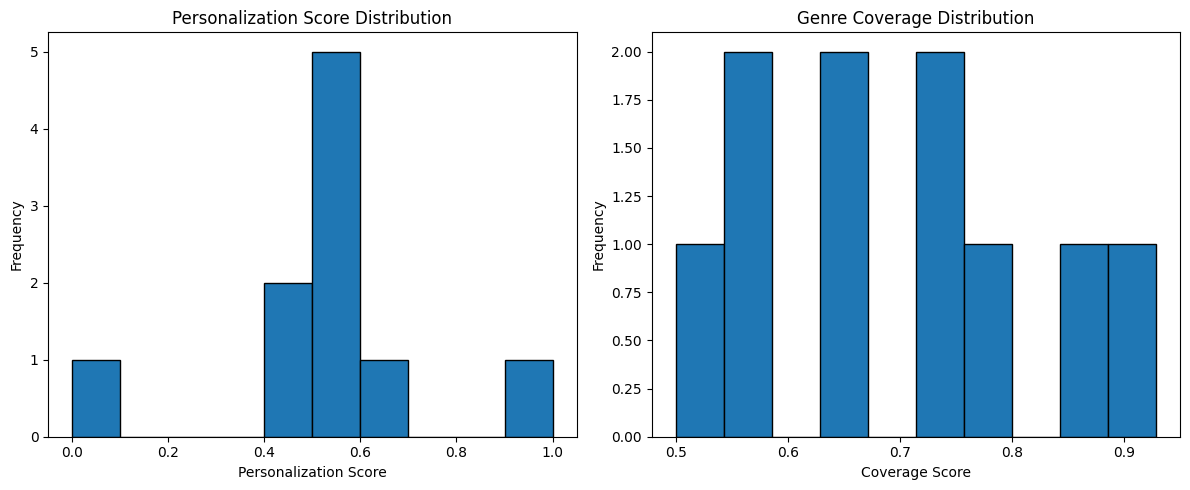

In [25]:

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(personalization_scores, bins=10, edgecolor='black')
plt.title('Personalization Score Distribution')
plt.xlabel('Personalization Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(coverage_scores, bins=10, edgecolor='black')
plt.title('Genre Coverage Distribution')
plt.xlabel('Coverage Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


| Aspek           | Nilai                    | Interpretasi                                                                  |
| --------------- | ------------------------ | ----------------------------------------------------------------------------- |
| Personalization | Sedang (0.5–0.6 dominan) | Sistem cukup personal, tetapi masih bisa ditingkatkan untuk hasil lebih unik. |
| Genre Coverage  | Baik (0.5–0.9)           | Rekomendasi menjangkau banyak genre, artinya tidak terlalu sempit.            |
